<a href="https://colab.research.google.com/github/SaiTejaMunja/SaiTeja_INFO5731_Fall2023/blob/main/Munja_SaiTeja_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Write your code here

# Using Second Source #2

# 10000 User Reviews of a film recently in 2023 or 2022 (you can choose any film) from IMDB.

# The Batman (2022) - Movie Name

import requests
from bs4 import BeautifulSoup
import csv

# Defining the URL of the IMDb page for the film's user reviews
film_url = "https://www.imdb.com/title/tt1877830/reviews"

# Creating a list to store all user reviews
all_user_reviews = []

# Defining the number of pages to scrape (adjust as needed)
num_pages_to_scrape = 800  # You can change this to collect more pages

for page_num in range(1, num_pages_to_scrape + 1):
    # Creating the URL for the current page
    page_url = f"{film_url}?start={((page_num - 1) * 10)}"

    # Sending an HTTP GET request to the IMDb page
    response = requests.get(page_url)

    if response.status_code == 200:
        # Parsing the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Finding the review elements on the page
        review_elements = soup.find_all("div", class_="text show-more__control")

        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            all_user_reviews.append(review_text)

    else:
        print(f"Failed to retrieve IMDb page {page_num}. Check the URL or your internet connection.")

# Creating a CSV file to store all user reviews
with open("imdb_user_reviews.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # Writing the header row
    writer.writerow(["User Review"])

    # Writing the data for each user review
    for review in all_user_reviews:
        writer.writerow([review])

print(f"Collected {len(all_user_reviews)} user reviews and saved to 'imdb_user_reviews.csv'.")

Collected 20000 user reviews and saved to 'imdb_user_reviews.csv'.


In [2]:
import pandas as pd
import nltk
nltk.download('all')
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from collections import Counter

# Read the dataset
imdb = pd.read_csv('imdb_user_reviews.csv')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [3]:
# importing necessary libraries

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initializing NLTK components

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# Defining function for Text cleaning

def clean_text(text):
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing special characters and punctuation, keep only alphabetic words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Tokenizing text
    tokens = word_tokenize(text)
    # Removing stop words and single-character tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    # Joining tokens back into a sentence
    clean_text = ' '.join(tokens)
    return clean_text

# Cleaning the 'User Review' column which has tweets in it

imdb['clean_text'] = imdb['User Review'].apply(clean_text)

# Selecting the first 100 tweets

tweets_100 = imdb.head(100)

In [4]:
subset_reviews = tweets_100['clean_text'][:100]

In [5]:
# Defining a Function to extract N-grams

def extract_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# (1) Counting the frequency of all the N-grams (N=3)
n = 3
ngram_freq = Counter()
for review in subset_reviews:
    ngram_freq.update(extract_ngrams(review, n))


# Printing out the frequency of all the N-grams

print("(1) Frequency of all the N-grams (N=3):")
print(ngram_freq.most_common)  # Display top 20 most frequent N-grams

(1) Frequency of all the N-grams (N=3):
<bound method Counter.most_common of Counter({'batman robert pattinson': 12, 'carmine falcone john': 12, 'falcone john turturro': 12, 'colin farrell paul': 8, 'farrell paul dano': 8, 'paul dano great': 8, 'favourite batman film': 8, 'matt reef batman': 8, 'heath ledger joker': 8, 'paul dano riddler': 8, 'wild michelle pfeiffer': 8, 'riddler paul dano': 8, 'colin farrell crime': 8, 'writerdirector matt reef': 8, 'story feel like': 8, 'zoe kravitz jeffrey': 8, 'kravitz jeffrey wright': 8, 'think robert pattinson': 8, 'detective batman peak': 4, 'batman peak great': 4, 'peak great storyline': 4, 'great storyline dark': 4, 'storyline dark universe': 4, 'dark universe weve': 4, 'universe weve come': 4, 'weve come expect': 4, 'come expect dc': 4, 'expect dc gloomy': 4, 'dc gloomy gritty': 4, 'gloomy gritty dark': 4, 'gritty dark tone': 4, 'dark tone film': 4, 'tone film exactly': 4, 'film exactly wanted': 4, 'exactly wanted think': 4, 'wanted think mov

In [6]:
# (2) Calculating all probabilities for bigrams
n = 2
bigram_freq = Counter()
unigram_freq = Counter()
for review in subset_reviews:
    tokens = nltk.word_tokenize(review)
    unigram_freq.update(tokens)
    bigram_freq.update(ngrams(tokens, n))

bigram_probabilities = {}
for bigram, freq in bigram_freq.items():
    word1, word2 = bigram
    bigram_probabilities[bigram] = freq / unigram_freq[word1]

# Printing out the  probabilities of all bigrams

print("(2) Probabilities for all the bigrams:")
for bigram, probability in list(bigram_probabilities.items())[:10]:
    print(f"{bigram}: {probability:.2f}")

(2) Probabilities for all the bigrams:
('detective', 'batman'): 0.22
('batman', 'peak'): 0.01
('peak', 'great'): 1.00
('great', 'storyline'): 0.04
('storyline', 'dark'): 0.20
('dark', 'universe'): 0.04
('universe', 'weve'): 0.20
('weve', 'come'): 0.50
('come', 'expect'): 0.17
('expect', 'dc'): 0.33


In [7]:
# (3) Extracting noun phrases and calculate relative probabilities

#defining function for calculating noun_phrases

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens)
    grammar = r"NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tagged)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))
    return noun_phrases

noun_phrase_freq = Counter()
for review in subset_reviews:
    noun_phrases = extract_noun_phrases(review)
    noun_phrase_freq.update(noun_phrases)

max_freq = max(noun_phrase_freq.values())
relative_probabilities = {index + 1: {noun_phrase: freq / max_freq for noun_phrase, freq in noun_phrase_freq.items()}
                         for index, _ in enumerate(imdb['User Review'])}

# Printing out the relative probabilities in a table

print("(3) Relative probabilities of noun phrases for each review:")
df_relative_probabilities = pd.DataFrame(relative_probabilities).T.fillna(0)
print(df_relative_probabilities)
df_relative_probabilities.head()

(3) Relative probabilities of noun phrases for each review:
       detective batman      peak  great storyline dark  \
1              0.039216  0.019608              0.019608   
2              0.039216  0.019608              0.019608   
3              0.039216  0.019608              0.019608   
4              0.039216  0.019608              0.019608   
5              0.039216  0.019608              0.019608   
...                 ...       ...                   ...   
19996          0.039216  0.019608              0.019608   
19997          0.039216  0.019608              0.019608   
19998          0.039216  0.019608              0.019608   
19999          0.039216  0.019608              0.019608   
20000          0.039216  0.019608              0.019608   

       dc gloomy gritty dark      tone      film  think movie  \
1                   0.019608  0.058824  0.921569     0.019608   
2                   0.019608  0.058824  0.921569     0.019608   
3                   0.019608  0.0588

,detective batman,peak,great storyline dark,dc gloomy gritty dark,tone,film,think movie,beautiful cinematography,great score,batmanthis movie,...,actionpacked movie,avenger,knightthe,batman action,detective film,enjoy,moisty mood,hasif,im sure youll,love
1,0.039216,0.019608,0.019608,0.019608,0.058824,0.921569,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
2,0.039216,0.019608,0.019608,0.019608,0.058824,0.921569,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
3,0.039216,0.019608,0.019608,0.019608,0.058824,0.921569,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
4,0.039216,0.019608,0.019608,0.019608,0.058824,0.921569,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
5,0.039216,0.019608,0.019608,0.019608,0.058824,0.921569,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [8]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

documents = tweets_100['clean_text'].tolist()

# Building document-terms (TF-IDF) matrix

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Designing a query
query = "An Outstanding movie with a haunting performance and best character development"

# Adding the query to the document list
documents.append(query)

# Calculating cosine similarity between the query and documents
cos_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Sorting documents based on cosine similarity
ranked_documents = [(similarity, idx) for idx, similarity in enumerate(cos_similarities[0])]
ranked_documents = sorted(ranked_documents, key=lambda x: x[0], reverse=True)

# Displaying ranked documents
print("Ranking of documents based on the query:")
for similarity, idx in ranked_documents:
    print(f"Document {idx + 1}: Similarity = {similarity:.4f}")
    print(f"Review: {imdb['User Review'][idx]}")
    print("-" * 50)

Ranking of documents based on the query:
Document 25: Similarity = 1.0000
Review: 3 hours hero movie...
It might be quite an adventure for those who expect action-packed movies like Avengers or The dark knight.The batman is not an action movie. It's a noir detective film..
Just enjoy the dark, moisty mood this movie has.If you enjoyed movies like Zodiac, Se7en i'm sure you'll love it
Go to the theatre immediately.
--------------------------------------------------
Document 50: Similarity = 1.0000
Review: 3 hours hero movie...
It might be quite an adventure for those who expect action-packed movies like Avengers or The dark knight.The batman is not an action movie. It's a noir detective film..
Just enjoy the dark, moisty mood this movie has.If you enjoyed movies like Zodiac, Se7en i'm sure you'll love it
Go to the theatre immediately.
--------------------------------------------------
Document 75: Similarity = 1.0000
Review: 3 hours hero movie...
It might be quite an adventure for those

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [10]:
pip install gensim

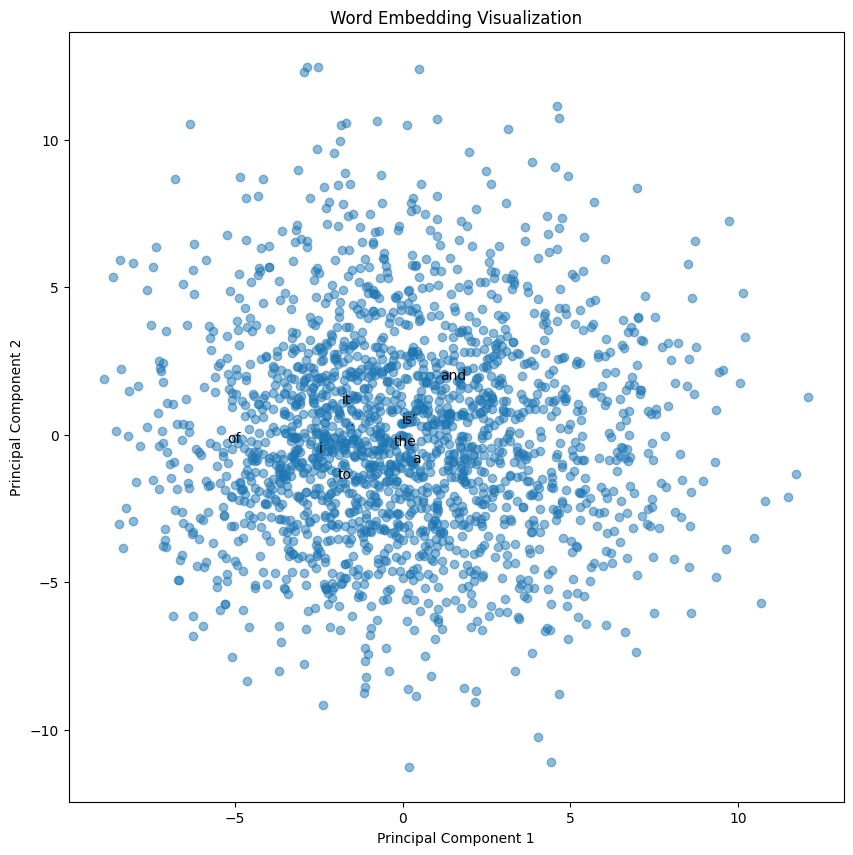

In [11]:
# Write your code here

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

documents = imdb['User Review'].tolist()

# Tokenizing the sentences into words
tokenized_data = [word_tokenize(review.lower()) for review in documents]

# Training Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Visualizing word embeddings using PCA

words = list(model.wv.index_to_key)
vectors = model.wv[words]

pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

plt.figure(figsize=(10, 10))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.5)

# Annotating some words on the plot
num_words_to_annotate = 10
for i, word in enumerate(words[:num_words_to_annotate]):
    plt.annotate(word, xy=(vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embedding Visualization')
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


https://github.com/SaiTejaMunja/SaiTeja_INFO5731_Fall2023/blob/main/annotated_tweets.csv


# Link:



